# Lab 2a: Trees

Lab associated with Module 2a: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\jarac\AppData\Local\Temp\ipykernel_23812\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [4]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

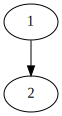

In [5]:
dot

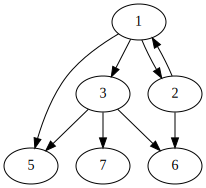

In [6]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [558]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        

def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [8]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [9]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [10]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [11]:
test3_tree = buildBinaryTree(test3)

In [12]:
test4 = [1,2,3,4,5,6,7,8]
test4_tree = buildBinaryTree(test4)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [13]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

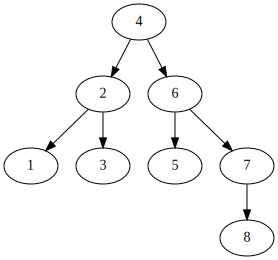

In [14]:
#Visual of test tree 1
dot = visualize_tree(test1_tree)

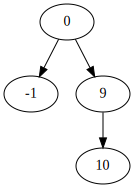

In [15]:
#Visual of test tree 2
dot = visualize_tree(test2_tree)

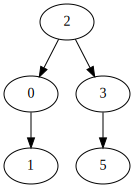

In [16]:
#Visual of test tree 3
dot = visualize_tree(test3_tree)

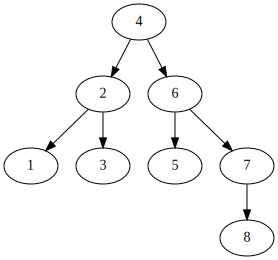

In [17]:
#Visual of test tree 4
dot = visualize_tree(test4_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [18]:
#Search method returns a boolean of whether the value is found in the BST
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [19]:
search(test3_tree, 3)

True

In [20]:
search(test1_tree, 18)

False

Let us write insert function now:

In [21]:
#Insert method places a new value in the BST in its respective position
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

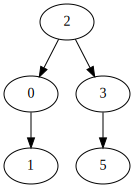

In [22]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

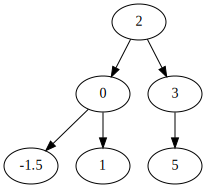

In [23]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [24]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

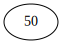

In [25]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

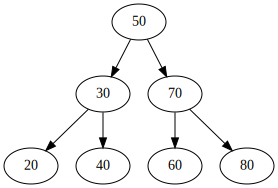

In [26]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

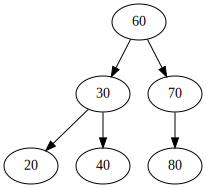

In [27]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

# Test Cases Activity 1

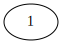

In [28]:
#Creating the first node of an unbalanced binary tree
test5_tree = buildBinaryTree([1])
dot = visualize_tree(test5_tree)

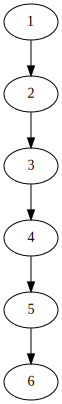

In [29]:
#Making the tree right heavy and unbalanced 
insert(test5_tree, 2)
insert(test5_tree, 3)
insert(test5_tree, 4)
insert(test5_tree, 5)
insert(test5_tree, 6)
dot = visualize_tree(test5_tree)

In [30]:
#Testing search method on test tree 5, expecting False
search(test5_tree, 18)

False

In [31]:
#Testing search method on test tree 5, expecting True
search(test1_tree, 6)

True

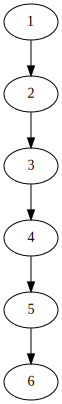

In [32]:
#Testing delete method on test tree 5 for a number that doesnt exist in the tree 
delete(test5_tree, 50)
dot = visualize_tree(test5_tree)

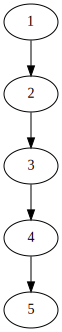

In [33]:
#Testing delete method on test tree 5
delete(test5_tree, 6)
dot = visualize_tree(test5_tree)

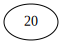

In [34]:
#Creating the first node of an unbalanced binary tree
test6_tree = buildBinaryTree([20])
dot = visualize_tree(test6_tree) 

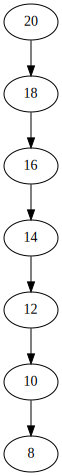

In [35]:
#Making the tree left heavy and unbalanced
insert(test6_tree, 18)
insert(test6_tree, 16)
insert(test6_tree, 14)
insert(test6_tree, 12)
insert(test6_tree, 10)
insert(test6_tree, 8)
dot = visualize_tree(test6_tree)

In [36]:
#Testing search method on test tree 6, expecting True
search(test6_tree, 14)

True

In [37]:
#Testing search method on test tree 6, expecting False
search(test6_tree, 25)

False

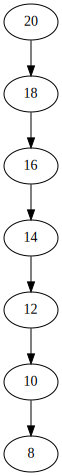

In [38]:
#Testing delete method on test tree 6
#****** Root node did not delete
delete(test6_tree, 20)
dot = visualize_tree(test6_tree)

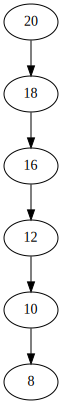

In [39]:
#Testing delete method on test tree 6 
delete(test6_tree, 14)
dot = visualize_tree(test6_tree)

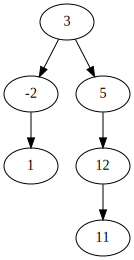

In [40]:
#Creates and visualizes test tree 7
test7_tree = buildBinaryTree([3])
insert(test7_tree, -2)
insert(test7_tree, 5)
insert(test7_tree, 1)
insert(test7_tree, 12)
insert(test7_tree, 11)
dot = visualize_tree(test7_tree)

In [41]:
#Testing search method on test tree 7, expecting True
search(test7_tree, 11)

True

In [42]:
#Testing search method on test tree 7, expecting False
search(test7_tree, 20)

False

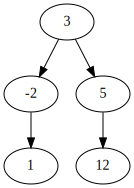

In [43]:
#Testing delete method on test tree 7 
delete(test7_tree, 11)
dot = visualize_tree(test7_tree)

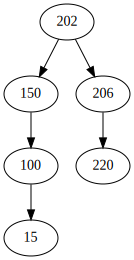

In [44]:
#Creates and visualizes test tree 8
test8_tree = buildBinaryTree([202])
insert(test8_tree, 150)
insert(test8_tree, 206)
insert(test8_tree, 100)
insert(test8_tree, 220)
insert(test8_tree, 15)
dot = visualize_tree(test8_tree)

In [45]:
#Testing search method on test tree 8, expecting True
search(test8_tree, 220)

True

In [46]:
#Testing search method on test tree 8, expecting False
search(test8_tree, 1)

False

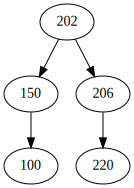

In [47]:
#Testing delete method on test tree 8 
delete(test8_tree, 15)
dot = visualize_tree(test8_tree)

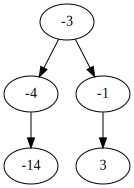

In [48]:
#Creates and visualizes test tree 9
test9_tree = buildBinaryTree([-3])
insert(test9_tree, -4)
insert(test9_tree, -1)
insert(test9_tree, -14)
insert(test9_tree, 3)
dot = visualize_tree(test9_tree)

In [49]:
#Testing search method on test tree 9, expecting True
search(test9_tree, 3)

True

In [50]:
#Testing search method on test tree 9, expecting False
search(test9_tree, 5)

False

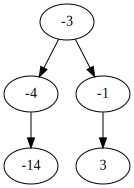

In [51]:
#Testing delete method on test tree 9 for a number not in the tree, Expecting no change  
delete(test9_tree, 11)
dot = visualize_tree(test9_tree)

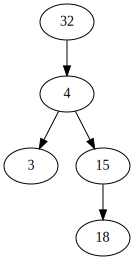

In [52]:
#Creates and visualizes test tree 10
test10_tree = buildBinaryTree([32])
insert(test10_tree, 4)
insert(test10_tree, 15)
insert(test10_tree, 18)
insert(test10_tree, 3)
dot = visualize_tree(test10_tree)

In [53]:
#Testing search method on test tree 10, expecting True
search(test10_tree, 32)

True

In [54]:
#Testing search method on test tree 10, expecting False
search(test10_tree, -32)

False

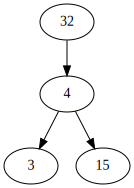

In [55]:
#Testing delete method on test tree 10 
delete(test10_tree, 18)
dot = visualize_tree(test10_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

In [56]:
### TODO ###
### Good Luck ###

#Method to get the tree height, will return 0 if there is no root found
def get_tree_height(root):
    if root is None: 
        return 0
    return 1 + max(get_tree_height(root.left)\
    , get_tree_height(root.right))

#Method uses helper method above
#Will return true if the right subtree and the left subtree are balanced, and if the height difference does not exceed 1
def is_balanced(root):
    # a None tree is balanced
    if root is None: 
        return True
    return is_balanced(root.right) and \
    is_balanced(root.left) and \
    abs(get_tree_height(root.left) - get_tree_height(root.right)) <= 1


In [57]:
#Checking the method on a balanced tree
is_balanced(test4_tree)

True

In [58]:
#Checking the tree height of test tree 4 
get_tree_height(test4_tree)

4

In [59]:
#Checking the method on an unbalanced tree
is_balanced(test5_tree)

False

***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

In [60]:
#### TODO ####
### Good Luck ###

#Method returns the lowest common ancestor of values p and q

def lowestCommonAncestor(root, p, q):
    #Base case for non existent root
    if root is None:
        return None
    #Checks to see if the value of the root matches either p or q
    if root.val == p or root.val == q:
        return root
 
    #recursive call on both subtrees 
    left_lowest_common_ancestor = lowestCommonAncestor(root.left, p, q)
    right_lowest_common_ancestor = lowestCommonAncestor(root.right, p, q)
    
    #The node that returns both non null values for both subtrees is the lowest common ancestor
    if left_lowest_common_ancestor and right_lowest_common_ancestor:
        return root
 
    # Otherwise check if left subtree or right subtree has the lowest common ancestor 
    return left_lowest_common_ancestor if left_lowest_common_ancestor is not None else right_lowest_common_ancestor
    

***

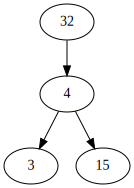

4

In [61]:
#Test of test tree 10's lowest common ancestor for values 3 and 15
dot = visualize_tree(test10_tree)
lowestCommonAncestor(test10_tree, 3, 15).val

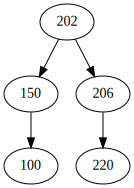

202

In [62]:
#Tests test tree 8's lowest common ancestor for values 100 and 220
dot = visualize_tree(test8_tree)
lowestCommonAncestor(test8_tree, 100, 220).val

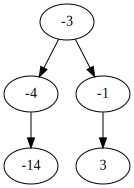

-3

In [63]:
#Tests test tree 9's lowest common ancestor for values -14 and -1
dot = visualize_tree(test9_tree)
lowestCommonAncestor(test9_tree, -14, -1).val

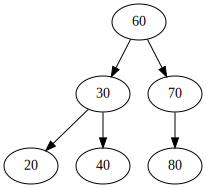

60

In [64]:
#Tests test tree 3's lowest common ancestor for values 30 and 80
dot = visualize_tree(test3_tree)
lowestCommonAncestor(test3_tree, 30, 80).val

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

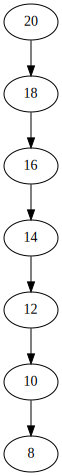

In [575]:
#Fixes Test tree
#Making the tree left heavy and unbalanced
insert(test6_tree, 18)
insert(test6_tree, 16)
insert(test6_tree, 14)
insert(test6_tree, 12)
insert(test6_tree, 10)
insert(test6_tree, 8)
dot = visualize_tree(test6_tree)

# Approach 1

In [563]:
#### TODO ####
### Good Luck ###
def rightRotation(root, node):

    node_to_rotate = search(root, node)
    
    if node_to_rotate == True:
        y = node.left
        T3 = y.right
 
    # Perform rotation
        y.right = node
        node.left = T3
 
    # Update heights
        node.height = 1 + max(get_tree_height(node.left), 
                           get_tree_height(node.right))
        y.height = 1 + max(get_tree_height(y.left), 
                           get_tree_height(y.right))
    # Return the new root
        return root
    else:
        return False

In [565]:
#Testing right rotation on node 14 of test tree 6
rightRotation(test6_tree, 14)

AttributeError: 'int' object has no attribute 'left'

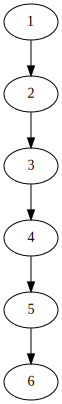

In [568]:
#Making the tree right heavy and unbalanced 
insert(test5_tree, 2)
insert(test5_tree, 3)
insert(test5_tree, 4)
insert(test5_tree, 5)
insert(test5_tree, 6)
dot = visualize_tree(test5_tree)

In [566]:
def leftRotation(root,node):
    
    node_to_rotate = search(root, node)
    
    if node_to_rotate == True:
    
        y = node.right
        T2 = y.left
    
        y.left = z
        node.right = T2
    
    # Update heights
        node.height = 1 + max(get_tree_height(node.left), 
                           get_tree_height(node.right))
        y.height = 1 + max(get_tree_height(y.left), 
                           get_tree_height(y.right))
        # Return the new root
        return root
    else:
        return False

        


In [ ]:
#testing left rotation on test tree 5 node 3
leftRotation(test5_tree, 3)

# Approach 2

In [464]:
#Rotate 1st check option ensures the node to rotate actually exists

def rotate(root,node):
    
    node_to_rotate = search(root, node)
    
    if node_to_rotate == True:
        return rotation(root, node)
    else:
        return False
    return root
        

In [465]:
#Rotation method chooses right or left rotate 
def rotation(root, node):

    balance = getBalanceFactor(root)
    
    if balance >1 and node < root.left.val:
        return rightRotate(root)
    
    if balance <-1 and node > root.right.val:
        return leftRotate(root)
    
    return root

#Gets the balance factor of the tree    
def getBalanceFactor(root):
    if not root:
        return 0
    
    return get_tree_height(root.left) - get_tree_height(root.right)

#Right rotation case
def rightRotate (node):
 
    y = node.left
    T3 = y.right
 
    # Perform rotation
    y.right = node
    node.left = T3
 
    # Update heights
    node.height = 1 + max(get_tree_height(node.left), 
                       get_tree_height(node.right))
    y.height = 1 + max(get_tree_height(y.left), 
                       get_tree_height(y.right))
 
    # Return the new root
    return y

#Left rotation case 
def leftRotate(z):
    
    y = z.right
    T2 = y.left
    
    y.left = z
    z.right = T2
    
    # Update heights
    z.height = 1 + max(get_tree_height(z.left), 
                       get_tree_height(z.right))
    y.height = 1 + max(get_tree_height(y.left), 
                       get_tree_height(y.right))
    return y

In [466]:
#Will return false because the node to rotate doesnt exist 
rotate(test6_tree, 0)

False

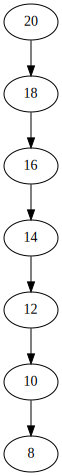

In [570]:
#No visible change 
dot = visualize_tree(test6_tree)

In [571]:
#Checking the balance factor of test tree 6, expecting 6 
getBalanceFactor(test6_tree)

6

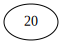

In [572]:
#Testing rotate on test tree 6 node 14
#***Ends up with only the root node?
rotate(test6_tree, 14)
dot = visualize_tree(test6_tree)

In [65]:
#Ignore its a backup for what I have changed above 
'''
def rotation(root, node):

    balance = getBalanceFactor(root)
    
    if balance >1 and node < root.left.val:
        return rightRotate(root)
    if balance <-1 and node > root.right.val:
        return leftRotate(root)
    return root

    
def getBalanceFactor(root):
    if not root:
        return 0
    
    return get_tree_height(root.left) - get_tree_height(root.right)

def rightRotate (z):
 
    y = z.left
    T3 = y.right
 
    # Perform rotation
    y.right = z
    z.left = T3
 
    # Update heights
    z.height = 1 + max(get_tree_height(z.left), get_tree_height(z.right))
    y.height = 1 + max(get_tree_height(y.left), get_tree_height(y.right))
 
    # Return the new root
    return y

def leftRotate(z):
    
    y = z.right
    T2 = y.left
    
    y.left = z
    z.right = T2
    
    z.height = 1 + max(get_tree_height(z.left)), get_tree_height(z.right)
    y.height = 1 + max(get_tree_height(y.left)), get_tree_height(y.right)
    return y
    
'''

***

### Section 6: Insertion in an AVL Tree

In [576]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):
     
        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif key < root.val:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
    
    #Recursive function to delete a key and self balance
    def delete(self, root, key):
     
       # Step 1 - Perform standard BST delete
        if not root:
            return root
 
        elif key < root.val:
            root.left = self.delete(root.left, key)
 
        elif key > root.val:
            root.right = self.delete(root.right, key)
 
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
 
            elif root.right is None:
                temp = root.left
                root = None
                return temp
 
            temp = self.getMinValueNode(root.right)
            root.val = temp.val
            root.right = self.delete(root.right,
                                      temp.val)
 
        # If the tree has only one node,then return that node
        if root is None:
            return root
 
        # Step 2 - Update the height of the ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Gets the balance 
        balance = self.getBalance(root)
 
        # Step 4 If an imbalance occurs, use 1 of the 4 rotation cases 
        # Case 1 - Left Rotation
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Rotation
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right Rotation
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left Rotation
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 


In [577]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)

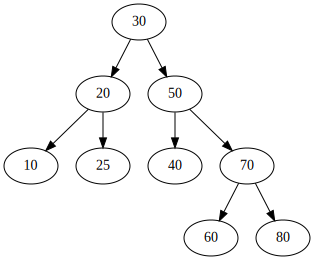

In [578]:
dot = visualize_tree(root)

# AVL Test Cases

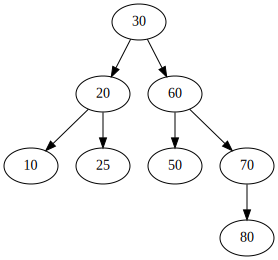

In [579]:
#Testing delete on my tree AVL tree
root = myTree.delete(root, 40)
dot = visualize_tree(root)

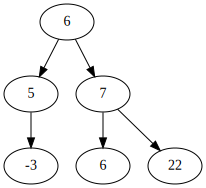

In [580]:
#Creating test avl tree 1 root needs to be null at the start because the tree will self adjust
test1TreeAvl = AVL_Tree()
root = None

root= test1TreeAvl.insert(root, 5)
root= test1TreeAvl.insert(root, 6)
root= test1TreeAvl.insert(root, 7)
root= test1TreeAvl.insert(root, 22)
root= test1TreeAvl.insert(root, -3)
root= test1TreeAvl.insert(root, 6)
dot = visualize_tree(root)

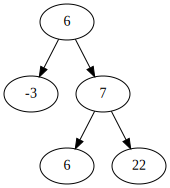

In [581]:
#Testing delete 5 on AVL test tree 1 
root= test1TreeAvl.delete(root, 5)
dot = visualize_tree(root)

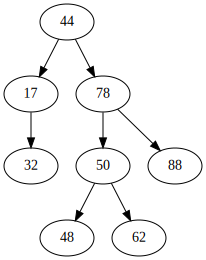

In [582]:
#Creating AVL test tree 2
test2TreeAvl = AVL_Tree()
root = None

root= test2TreeAvl.insert(root, 44)
root= test2TreeAvl.insert(root, 78)
root= test2TreeAvl.insert(root, 17)
root= test2TreeAvl.insert(root, 32)
root= test2TreeAvl.insert(root, 50)
root= test2TreeAvl.insert(root, 88)
root= test2TreeAvl.insert(root, 48)
root= test2TreeAvl.insert(root, 62)
dot = visualize_tree(root)


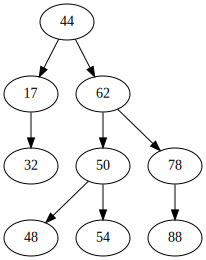

In [583]:
#Testing insert 54 on AVL test tree 2
root= test2TreeAvl.insert(root, 54)
dot = visualize_tree(root)

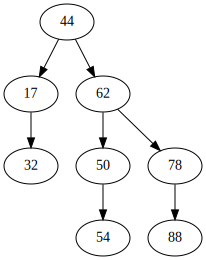

In [584]:
#Testing delete 48 on AVL test tree 2
root= test2TreeAvl.delete(root, 48)
dot = visualize_tree(root)

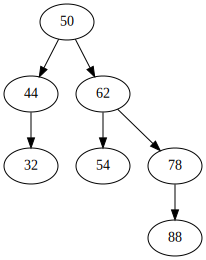

In [585]:
#Testing delete 17 on AVL test tree 2
root= test2TreeAvl.delete(root, 17)
dot = visualize_tree(root)

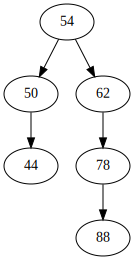

In [586]:
#Testing delete 32 on AVL test tree 2
root= test2TreeAvl.delete(root, 32)
dot = visualize_tree(root)

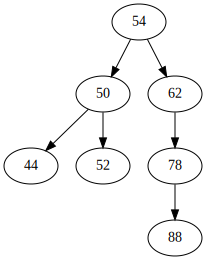

In [587]:
root= test2TreeAvl.insert(root, 52)
dot = visualize_tree(root)

***